# 0.0 - Importações e Funções

## 0.1 - Importações

In [1]:
import pandas                as pd
import seaborn               as sns
import scikitplot            as skplt
import matplotlib.pyplot     as plt
import xgboost               as xgb
import scikitplot            as skplt
import numpy as np

from imblearn.over_sampling    import SMOTE
from imblearn.under_sampling   import NearMiss
from sklearn.metrics           import accuracy_score, precision_score, recall_score
from sklearn.ensemble          import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.linear_model      import LogisticRegression
from sklearn.model_selection   import train_test_split, cross_val_score, StratifiedKFold, cross_validate, cross_val_predict
from sklearn.feature_selection import RFE
from sklearn.tree              import DecisionTreeClassifier
from sklearn.preprocessing     import RobustScaler, MinMaxScaler
  



import warnings
warnings.filterwarnings('ignore')

## 0.2 - Funções

In [2]:
def classe_social(coluna):
    if coluna <= 450:
        return 1
    elif coluna > 450 and coluna <=550:
        return 2
    elif coluna >550 and coluna <=650:
        return 3
    elif coluna >650 and coluna <=750:
        return 4
    else:
        return 5

In [3]:
def media_balance(cols):
    balance = cols[0]
    NumOfProducts = cols[1]

    if balance == 0:
        if NumOfProducts == 1:
            return 98551.870614
        elif NumOfProducts == 2:
            return 51879.145813
        elif NumOfProducts == 3:
            return 75458.328195
        else:
            return 93733.135000
    else:
        return balance   

# 1.0 - DataFrame

## 1.1 Leitura do DataFrame

In [4]:
df = pd.read_csv('churn.csv')

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# 2.0 - Análise Descritiva

## 2.1 Análise descritiva dos dados

In [6]:
df.shape

(10000, 14)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [9]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# 3.0 - Feature Enginering

In [10]:
df['Balance'] = df[['Balance', 'NumOfProducts']].apply(media_balance, axis=1)

In [11]:
df['score'] = df['CreditScore'].apply(classe_social)

In [12]:
df['faixa_etaria'] = df['Age'].apply(lambda x: 'Jovem' if x<45 else ('meia idade' if x>=45 and x<60 else 'idoso'))

# 4.0 - Análise Exploratória

## 4.1 - Analise Univariada

### 4.1.1 Variavel Resposta

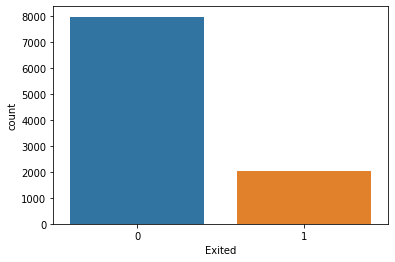

In [13]:
sns.countplot(x='Exited', data=df);

### 4.1.2 Variaveis Numericas

In [14]:
df_cat_col = df.select_dtypes(include='object')
df_num_col = df.select_dtypes(exclude='object')

In [15]:
df1_num_col = df_num_col.drop(['RowNumber','CustomerId'], axis=1)

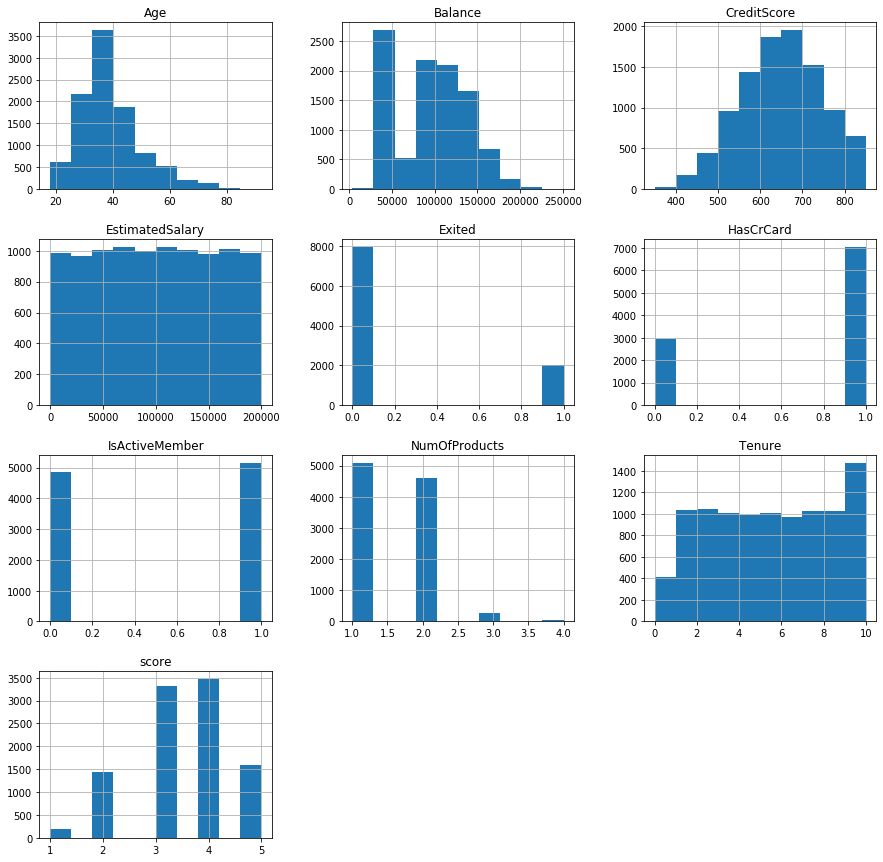

In [16]:
fig = plt.figure(figsize=(15,15))
ax = fig.gca()
df1_num_col.hist(ax=ax);

### 4.1.3 Variaveis Categoricas

#### Gráfico Países

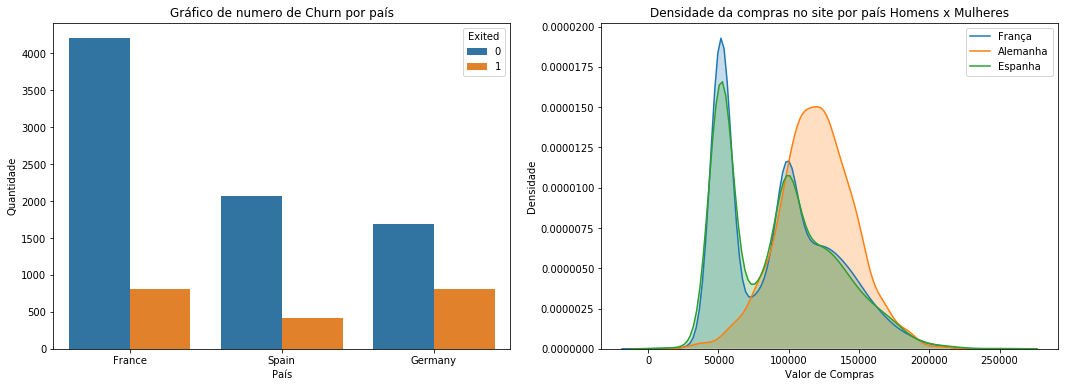

In [17]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
plt.title('Gráfico de numero de Churn por país')
sns.countplot(x='Geography', hue='Exited', data=df)
plt.xlabel('País'),plt.ylabel('Quantidade')


plt.subplot(1,2,2)
plt.title('Densidade da compras no site por país Homens x Mulheres')
sns.kdeplot(df[df['Geography'] == "France"]['Balance'],label='França', shade=True)
sns.kdeplot(df[df['Geography'] == 'Germany']['Balance'],label='Alemanha', shade=True)
sns.kdeplot(df[df['Geography'] == 'Spain']['Balance'],label='Espanha', shade=True)
plt.xlabel('Valor de Compras'),plt.ylabel('Densidade');

#### Gráficos de Densidade por gênero

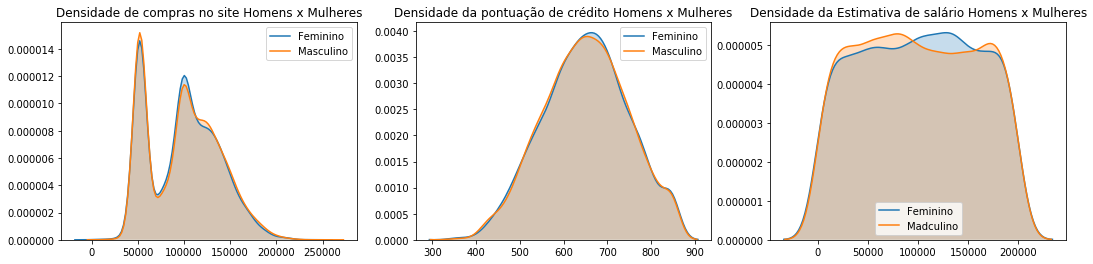

In [18]:
plt.figure(figsize=(18,4))
plt.subplot(1,3,1)
plt.title('Densidade de compras no site Homens x Mulheres')
sns.kdeplot(df[df['Gender'] == "Female"]['Balance'],label='Feminino', shade=True)
sns.kdeplot(df[df['Gender'] == 'Male']['Balance'],label='Masculino', shade=True)

plt.subplot(1,3,2)
plt.title('Densidade da pontuação de crédito Homens x Mulheres')
sns.kdeplot(df[df['Gender'] == "Female"]['CreditScore'],label='Feminino', shade=True)
sns.kdeplot(df[df['Gender'] == 'Male']['CreditScore'],label='Masculino', shade=True)

plt.subplot(1,3,3)
plt.title('Densidade da Estimativa de salário Homens x Mulheres')
sns.kdeplot(df[df['Gender'] == "Female"]['EstimatedSalary'],label='Feminino', shade=True)
sns.kdeplot(df[df['Gender'] == 'Male']['EstimatedSalary'],label='Madculino', shade=True);

#### Gráficos de Densidade por faixa etaria

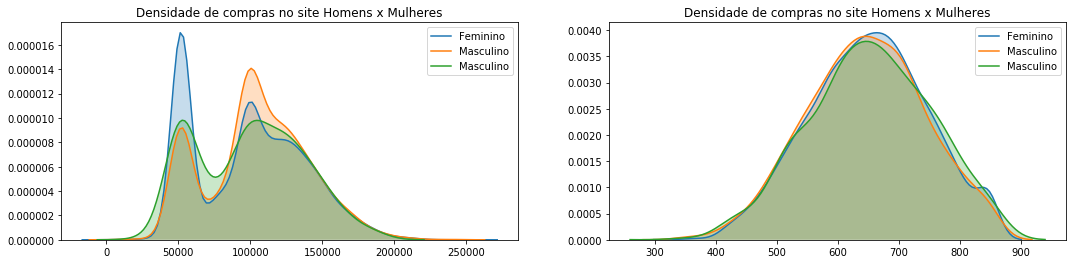

In [19]:
plt.figure(figsize=(18,4))
plt.subplot(1,2,1)
plt.title('Densidade de compras no site Homens x Mulheres')
sns.kdeplot(df[df['faixa_etaria'] == 'Jovem']['Balance'],label='Feminino', shade=True)
sns.kdeplot(df[df['faixa_etaria'] == 'meia idade']['Balance'],label='Masculino', shade=True)
sns.kdeplot(df[df['faixa_etaria'] == 'idoso']['Balance'],label='Masculino', shade=True)

plt.subplot(1,2,2)
plt.title('Densidade de compras no site Homens x Mulheres')
sns.kdeplot(df[df['faixa_etaria'] == 'Jovem']['CreditScore'],label='Feminino', shade=True)
sns.kdeplot(df[df['faixa_etaria'] == 'meia idade']['CreditScore'],label='Masculino', shade=True)
sns.kdeplot(df[df['faixa_etaria'] == 'idoso']['CreditScore'],label='Masculino', shade=True);

## 4.2 - Analise Bivariada

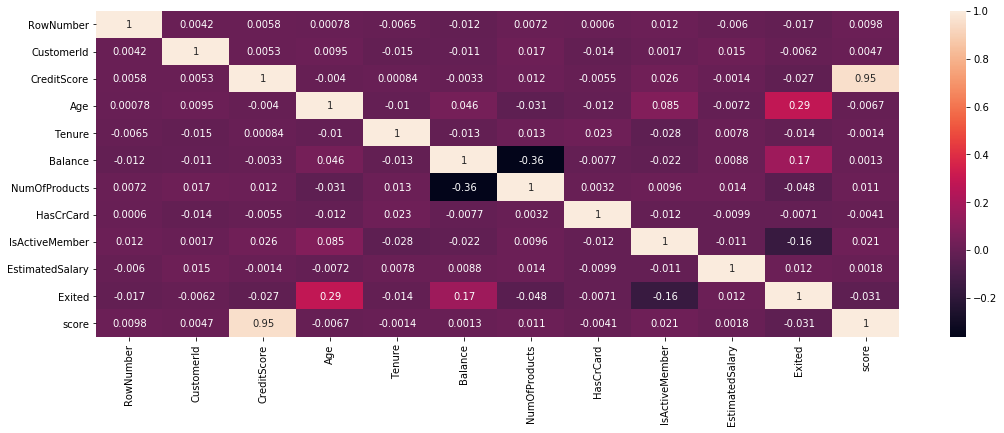

In [20]:
corr = df.corr()
plt.figure(figsize=(18,6))
sns.heatmap(corr, annot=True);

## 4.3 - Analise Multivariada

**H1 - Consumidores Alemães entram 10% mais em Churn do que os consumidores de outros países.** 

**Verdadeiro** - Em média, os alemães entram 15% a mais em churn do que consumidores de outros países. 

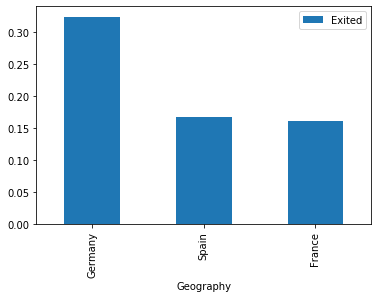

In [21]:
aux1 = df[['Geography','Exited']].groupby('Geography').mean().sort_values(by=['Exited'], ascending=False)
aux1.plot.bar();

**H2 - Consumidoras mulheres entram mais em Churn do que os consumidores Homens.** 

**Verdadeiro** - Percentualmente mais mulheres entram em churn do que homens.

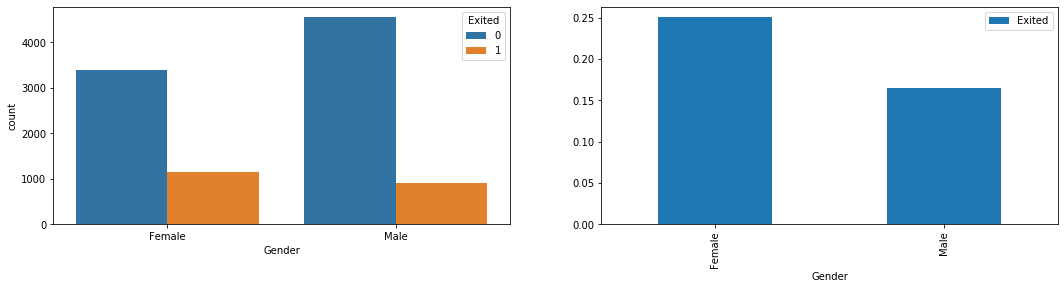

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

sns.countplot(x='Gender', hue='Exited', data=df, ax=ax[0])

aux2 = df[['Gender','Exited']].groupby('Gender').mean().sort_values(by=['Exited'], ascending=False)
aux2.plot.bar(ax=ax[1]);


**H3 - Consumidores Alemães gastam mais que 10% em média a mais que consumidores de outros países** 

**Verdadeiro** - Os Alemães gastam mais de 10% a mais em média do que consumidores de outros países.

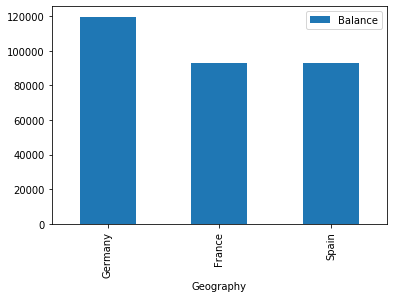

In [23]:
aux3 = df[['Geography','Balance']].groupby('Geography').mean().sort_values(by=['Balance'], ascending=False)
aux3.plot.bar();

**H4 - Consumidores com mais CreditScore entram em churn 10% a menos do que consumidores com menos CreditScore.**

**Falso** - Consumidores com mais CreditScore tem mais ou menos a mesma média de churn. Uma coisa interessante há se notar é que clientes com CreditScore de 350 até 450 tem 10% de chance a mais de entrar em Churn. 

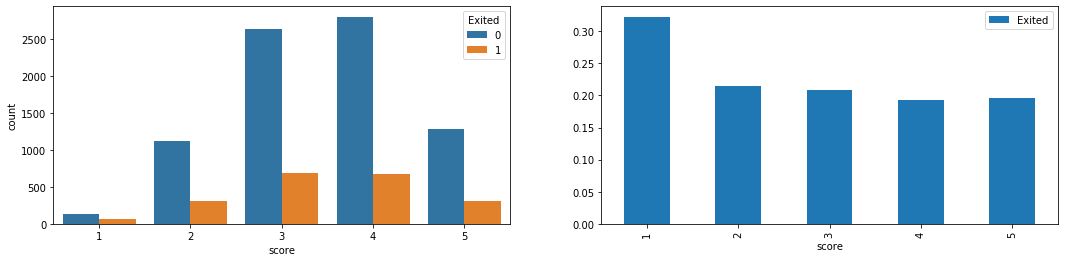

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

sns.countplot(x='score', hue='Exited', data=df, ax=ax[0])

aux4 = df[['score', 'Exited']].groupby('score').mean()
aux4.plot.bar(ax=ax[1]);

**H5 - Consumidores jovens entram em churn 50% a mais em média do que os demais consumidores.**

**Falso** - Consumidores de meia idade tem mais propensão para entrar em churn do que os demais consumidores.

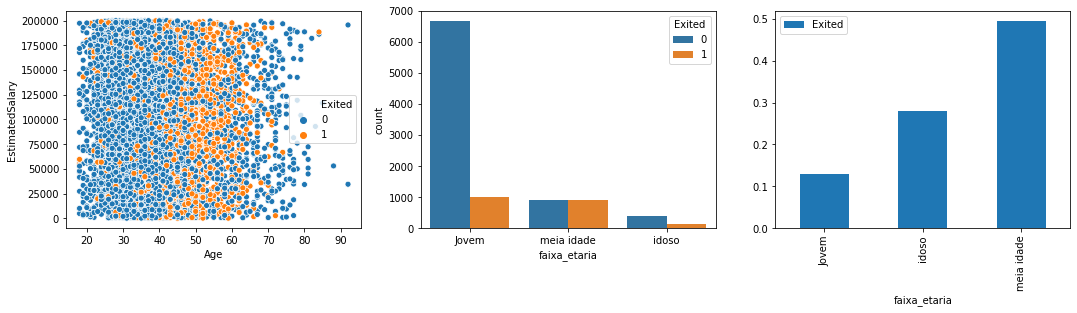

In [25]:
fig, ax = plt.subplots(1, 3, figsize=(18,4))

sns.scatterplot(x='Age',y='EstimatedSalary', hue='Exited', data=df, ax=ax[0] )

sns.countplot(x='faixa_etaria', hue='Exited', data=df, ax=ax[1])

aux4= df[['faixa_etaria', 'Exited']].groupby('faixa_etaria').mean()
aux4.plot.bar(ax=ax[2]);

**H6 - Consumidores ativos por mais tempo costumam gastar mais em compras na loja.**

**Falso** - Quanto mais tempo os clientes ficam ativos, menos eles gastam em média na loja. Clientes ativos por mais tempo tem os maiores salários.

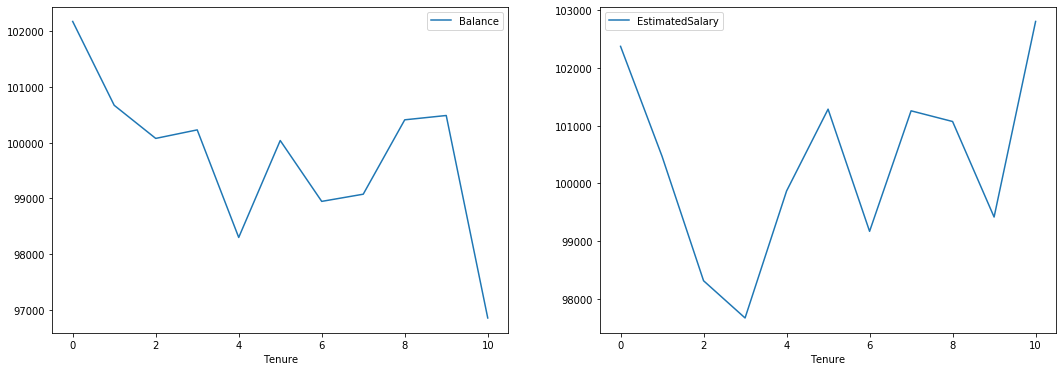

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(18,6))

aux5 = df[['Balance', 'Tenure']].groupby('Tenure').mean()
aux5.plot(ax=ax[0])

aux6 = df[['EstimatedSalary', 'Tenure']].groupby('Tenure').mean()
aux6.plot(ax=ax[1]);

# 5.0 Preparação dos dados

In [27]:
df_cat_col.head()

,Surname,Geography,Gender,faixa_etaria
0,Hargrave,France,Female,Jovem
1,Hill,Spain,Female,Jovem
2,Onio,France,Female,Jovem
3,Boni,France,Female,Jovem
4,Mitchell,Spain,Female,Jovem


In [28]:
df_cat_col = df_cat_col.drop('Surname', axis=1)

In [29]:
df_cat_col1 = pd.get_dummies(df_cat_col, drop_first=True)
df2 = pd.concat([df_cat_col1, df_num_col], axis=1)
df2.columns

Index(['Geography_Germany', 'Geography_Spain', 'Gender_Male',
       'faixa_etaria_idoso', 'faixa_etaria_meia idade', 'RowNumber',
       'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'score'],
      dtype='object')

In [30]:
df3 = df2.drop(['RowNumber', 'CustomerId'], axis=1)

In [31]:
df3.columns

Index(['Geography_Germany', 'Geography_Spain', 'Gender_Male',
       'faixa_etaria_idoso', 'faixa_etaria_meia idade', 'CreditScore', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited', 'score'],
      dtype='object')

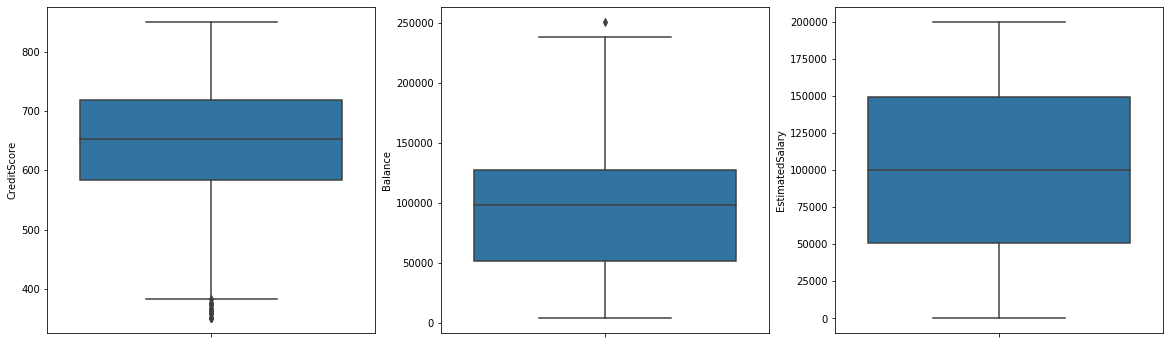

In [32]:
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
sns.boxplot(y='CreditScore', data=df3)

plt.subplot(1,3,2)
sns.boxplot(y='Balance', data=df3)

plt.subplot(1,3,3)
sns.boxplot(y='EstimatedSalary', data=df3);

In [33]:
mm = MinMaxScaler()
rb = RobustScaler()

In [34]:
df3['CreditScore'] = mm.fit_transform(df3[['CreditScore']].values)

df3['Tenure'] = mm.fit_transform(df3[['Tenure']].values)

df3['Age'] = mm.fit_transform(df3[['Age']].values)

df3['score'] = mm.fit_transform(df3[['score']].values)

df3['Balance'] = mm.fit_transform(df3[['Balance']].values)

df3['EstimatedSalary'] = mm.fit_transform(df3[['EstimatedSalary']].values)

# 6.0 - Escolha de variavéis

In [35]:
df3.head()

,Geography_Germany,Geography_Spain,Gender_Male,faixa_etaria_idoso,faixa_etaria_meia idade,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,score
0,0,0,0,0,0,0.538,0.324324,0.2,0.383537,1,1,1,0.506735,1,0.50
1,0,1,0,0,0,0.516,0.310811,0.1,0.323876,1,0,1,0.562709,0,0.50
2,0,0,0,0,0,0.304,0.324324,0.8,0.630812,3,1,0,0.569654,1,0.25
3,0,0,0,0,0,0.698,0.283784,0.1,0.194677,2,0,0,0.469120,0,0.75
4,0,1,0,0,0,1.000,0.337838,0.2,0.492625,1,1,1,0.395400,0,1.00


# Machine Learning

In [36]:
kfold = StratifiedKFold(n_splits=10, random_state=1)

In [37]:
X = df3.drop(['Exited'], axis=1)
y = df3['Exited']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1, stratify=y)

In [39]:
smt = NearMiss()

In [40]:
X_train, y_train = smt.fit_sample(X_train, y_train)

In [41]:
lr = LogisticRegression()
dtc = DecisionTreeClassifier()
etx = ExtraTreesClassifier()
rfc = RandomForestClassifier()
gbc = GradientBoostingClassifier()


In [42]:
def treste (modelo):
    scores = cross_validate(modelo, X_train, y_train, cv=kfold ,scoring=('precision',
                                                             'accuracy', 
                                                             'recall', 
                                                             'roc_auc',
                                                             'balanced_accuracy',
                                                            'f1',
                                                            'average_precision')
                           ,return_train_score=False)
    print ('Acuracia do modelo', scores['test_accuracy'].mean())
    print ('Recall do modelo', scores['test_recall'].mean())
    print ('Precision do modelo',scores['test_precision'].mean())
    print ('ROC AUC do modelo',scores['test_roc_auc'].mean())
    print ('Acuracia balanceada',scores['test_balanced_accuracy'].mean())
    print ('F1',scores['test_f1'].mean())
    print ('average precision',scores['test_average_precision'].mean())

In [43]:
treste (lr)

Acuracia do modelo 0.7437490624665166
Recall do modelo 0.7002837977296182
Precision do modelo 0.7683492556363045
ROC AUC do modelo 0.8234905434482014
Acuracia balanceada 0.7437414000687994
F1 0.7322281856212846
average precision 0.8395328242282473


In [44]:
treste (dtc)

Acuracia do modelo 0.6766720240008572
Recall do modelo 0.6779884760921913
Precision do modelo 0.6771635069500033
ROC AUC do modelo 0.6766533367733059
Acuracia balanceada 0.6766533367733059
F1 0.6771310075685311
average precision 0.6204983352365849


In [45]:
treste (etx)

Acuracia do modelo 0.7385363762991536
Recall do modelo 0.702218782249742
Precision do modelo 0.7602850390551718
ROC AUC do modelo 0.8092953030885557
Acuracia balanceada 0.738501891984864
F1 0.7289061076701018
average precision 0.8207263257696731


In [46]:
treste(rfc)

Acuracia do modelo 0.7486799528554591
Recall do modelo 0.726436188510492
Precision do modelo 0.7630529833715765
ROC AUC do modelo 0.8274962283961859
Acuracia balanceada 0.748656260749914
F1 0.7432860528111307
average precision 0.8350854514048616


In [47]:
treste (gbc)

Acuracia do modelo 0.7673245473052609
Recall do modelo 0.7401616787065703
Precision do modelo 0.7845334342981917
ROC AUC do modelo 0.8525141870760459
Acuracia balanceada 0.7672923116615068
F1 0.7608911827802282
average precision 0.8693855507033217


In [48]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [49]:
y_pred = rfc.predict(X_test)

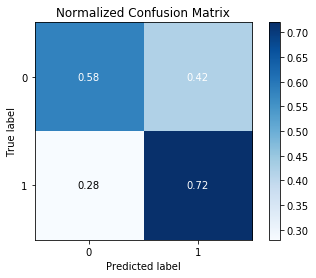

In [50]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)

In [51]:
accuracy_score(y_test, y_pred)

0.6076

In [52]:
precision_score(y_test, y_pred)

0.304635761589404

In [53]:
recall_score(y_test, y_pred)

0.7229862475442044

In [54]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [55]:
y_pred = lr.predict(X_test)

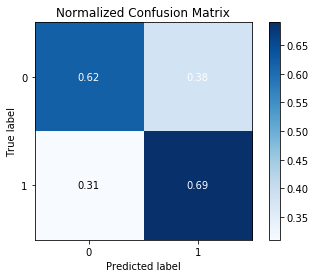

In [56]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred,normalize=True)

In [57]:
accuracy_score(y_test, y_pred)

0.6388

In [58]:
precision_score(y_test, y_pred)

0.3209090909090909

In [59]:
recall_score(y_test, y_pred)

0.693516699410609

In [60]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [61]:
y_pred = gbc.predict(X_test)

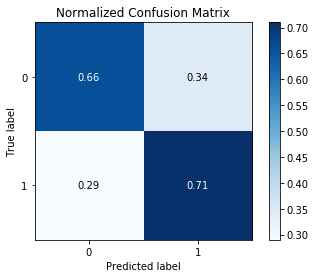

In [62]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred,normalize=True)

In [63]:
accuracy_score(y_test, y_pred)

0.6684

In [64]:
precision_score(y_test, y_pred)

0.34615384615384615

In [65]:
recall_score(y_test, y_pred)

0.7072691552062869